# Cifar - 10 VGG Model

In [1]:
# Importing the libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [0]:
# Function to load the unpickled data files
def unpickle(file):
    import pickle
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
    return dict

dirs = ['batches.meta','data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5','test_batch']
all_data = [0,1,2,3,4,5,6]

for i,direc in zip(all_data,dirs):
    all_data[i] = unpickle(direc)

In [0]:
# Assigning batches to variables
batch_meta = all_data[0]
data_batch1 = all_data[1]
data_batch2 = all_data[2]
data_batch3 = all_data[3]
data_batch4 = all_data[4]
data_batch5 = all_data[5]
test_batch = all_data[6]

In [0]:
# Helper class to organize images
class CifarHelper():
    
    def __init__(self):
        self.i = 0
        
        self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        self.test_batch = [test_batch]
        
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])
        train_len = len(self.training_images)
        
        self.training_images = self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        self.training_labels = to_categorical(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        test_len = len(self.test_images)
        
        self.test_images = self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
        self.test_labels = to_categorical(np.hstack([d[b"labels"] for d in self.test_batch]), 10)
        
        return self.training_images, self.training_labels, self.test_images, self.test_labels

In [0]:
# My Model
def define_model():
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
   
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
# run the test harness for evaluating a model
def run_test_harness():
    
    global trainX, trainY, testX, testY, history, model
    
    # load dataset
    ch = CifarHelper()
    trainX, trainY, testX, testY = ch.set_up_images()
    
    # define and fit the model 
    model = define_model()
    history = model.fit(trainX, trainY, epochs=25, batch_size = 64, validation_data=(testX, testY), verbose=0)
    
    # evaluating model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('%.3f' % (acc * 100.0))

In [7]:
# run the model
run_test_harness()

Setting Up Training Images and Labels
Setting Up Test Images and Labels
77.610


In [0]:
# Plot for summary and evaluating model
def summarize_diagnostics(history):
    
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.tight_layout()
    
    # save plot to file
    plt.savefig('/content/plot.png')
    plt.close()

In [0]:
# learning curves
summarize_diagnostics(history)

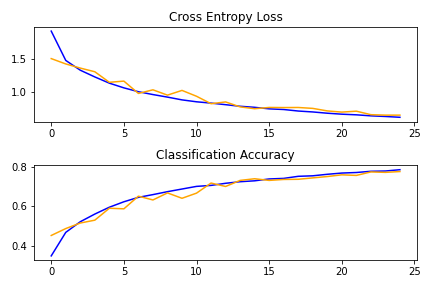

In [1]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [0]:
def show_imgs(x_test,  n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(32,32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

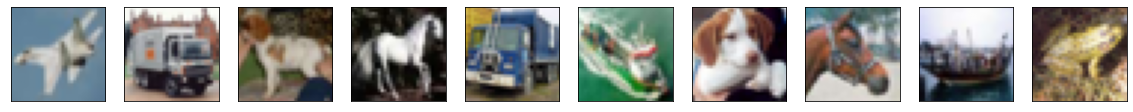

Predicted Class for image 1: airplane
Predicted Class for image 2: truck
Predicted Class for image 3: deer
Predicted Class for image 4: horse
Predicted Class for image 5: truck
Predicted Class for image 6: ship
Predicted Class for image 7: dog
Predicted Class for image 8: horse
Predicted Class for image 9: ship
Predicted Class for image 10: frog


In [12]:
prediction = model.predict_classes(testX[10:20])
show_imgs(testX[10:20])
for i in range(10):
    print('Predicted Class for image {}: {}'.format(i+1,classes[prediction[i]]))

In [13]:
testX.shape

(10000, 32, 32, 3)

In [14]:
trainX.shape

(50000, 32, 32, 3)